In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split

url = '../../Data/Processed/inside.csv'

df = pd.read_csv(url)

In [3]:
df['noted_date'] = pd.to_datetime(df.noted_date)
df = df.set_index('noted_date')
df.head()

,simple_id,room_id,temp,out/in
noted_date,,,,
2018-01-11 00:06:00,16219,Room Admin,32,In
2018-01-11 02:12:00,16187,Room Admin,32,In
2018-01-11 02:44:00,16177,Room Admin,32,In
2018-01-11 02:46:00,16175,Room Admin,32,In
2018-01-11 02:58:00,16168,Room Admin,31,In


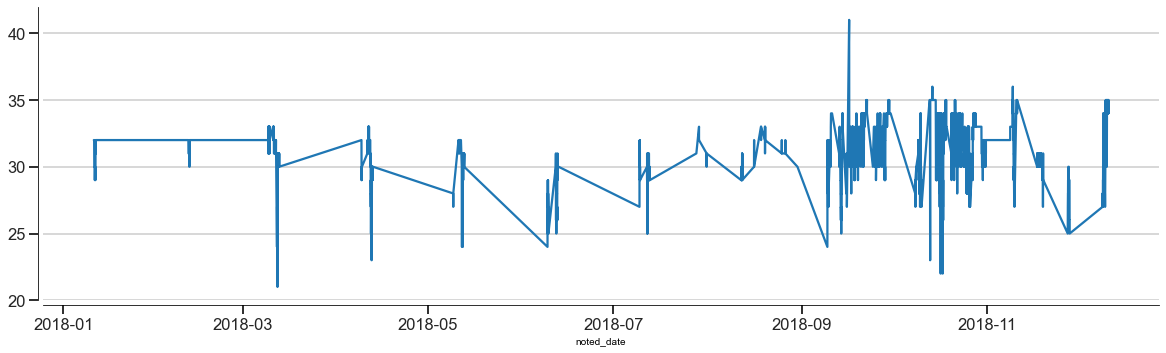

In [4]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")
sns.set_context("talk")

df.temp.plot(ax=ax)
ax.yaxis.grid(True)
sns.despine(offset=5, trim=False)

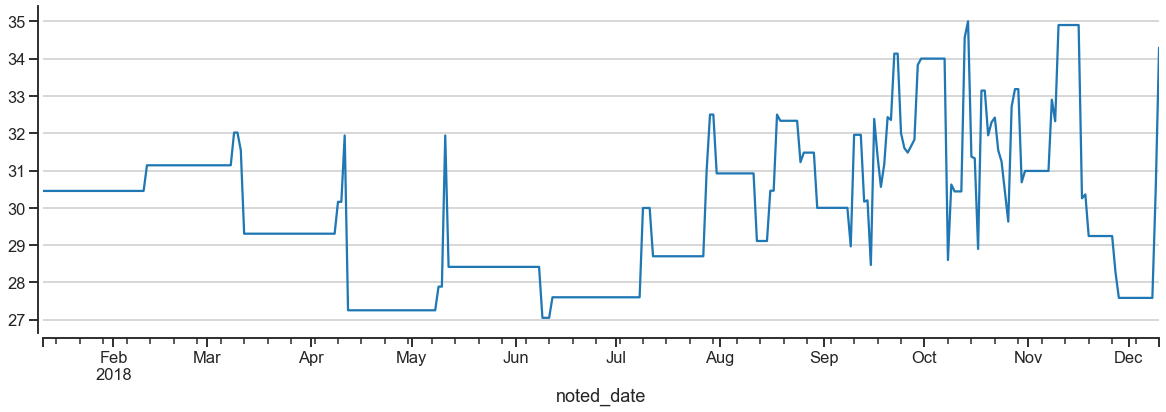

In [5]:
resample_df = df.resample('d')['temp'].mean()
resample_df.ffill(inplace=True)

fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")
sns.set_context("talk")

resample_df.plot(ax=ax)
ax.yaxis.grid(True)
sns.despine(offset=5, trim=False)

In [6]:
train = resample_df[resample_df.index < '2018-10-01 00:00:00']
test = resample_df[resample_df.index >= '2018-10-01 00:00:00']

In [7]:
train_prophet = train.reset_index().rename(columns={'noted_date':'ds', 'temp':'y'})


In [16]:
from prophet import Prophet

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
model = Prophet(n_changepoints=4)
model.fit(train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.19063


/usr/local/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       800.221   0.000947048       15.5027           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       800.308   0.000109225      0.442789           1           1      209   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [18]:
period = resample_df.shape[0] - train_prophet.shape[0]

In [19]:
future = model.make_future_dataframe(periods=period, freq="d")
forecast = model.predict(future)

/usr/local/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


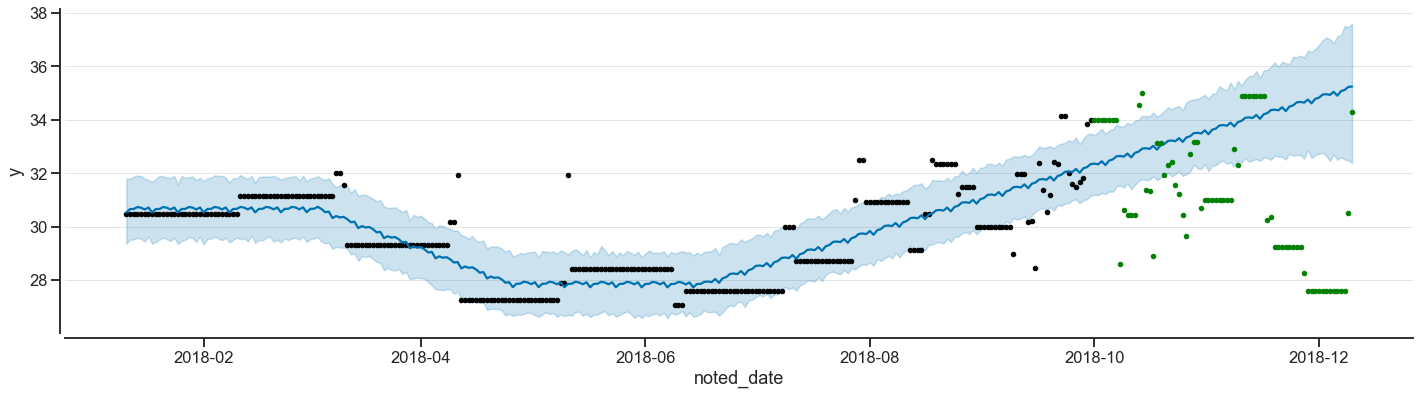

In [20]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")

sns.set_context("talk")
model.plot(forecast, ax=ax);

test.plot(ax=ax, c="g",marker='.',ls='None');
ax.yaxis.grid(True)

sns.despine(offset=5, trim=False)